In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split

In [2]:
from bml_analysis_io import *
from bml_analysis_func import *
from bml_analysis_plot import *

In [3]:
from asaplib.fit import LC_SCOREBOARD

In [4]:
def base2model(base_list, mode_list):
    return [ a+'_'+m for a in base_list for m in mode_list]

In [5]:
bmol = {}

bmol_acsf_base = [ 'acsf_longrange', 
                   'acsf_minimal', 
                   'acsf_smart']
bmol['acsf'] = base2model(base2model(bmol_acsf_base, ['ext','int']), ['rr','krr'])

bmol_cm_base = ['cm_eigenspectrum', 'cm_sorted_l2' ]
bmol['cm'] = base2model(bmol_cm_base, ['rr','krr'])


bmol_ecfp_base = ['ecfp4', 'ecfp6' ]
bmol['ecfp'] = base2model(bmol_ecfp_base, ['rr','krr'])


bmol_gylm_base = [ 'gylm_minimal', 
                   'gylm_standard']
bmol['gylm'] = base2model(base2model(bmol_gylm_base, ['ext','int']), ['rr','krr'])


bmol_mbtr_base = [ 'mbtr']
bmol['mbtr'] = base2model(base2model(bmol_mbtr_base, ['ext','int']), ['rr','krr'])


bmol_pdf_base = ['pdf_gylm_minimal', 'pdf_gylm_standard', 'pdf_soap_minimal','pdf_soap_standard']
bmol['pdf'] = base2model(bmol_pdf_base, ['rr','krr'])

bmol_physchem_base = ['physchem_basic', 'physchem_core', 'physchem_extended','physchem_logp']
bmol['physchem'] = base2model(bmol_physchem_base, ['rr','rf'])

bmol_soap_base = [ 'soap_longrange', 
                   'soap_minimal', 
                   'soap_smart']
bmol['soap'] = base2model(base2model(base2model(bmol_soap_base,['cross','nocross']), ['ext','int']), ['rr','krr'])

## parse

In [6]:
prefix = 'qm7'
file_prefix = 'benchmark_'+prefix

In [7]:
by_model = parse(file_prefix+'.json.gz')

In [8]:
all_model_keys = list(by_model.keys())
print(all_model_keys)

['bmol_acsf_longrange_ext_krr', 'bmol_acsf_longrange_ext_rr', 'bmol_acsf_longrange_int_krr', 'bmol_acsf_longrange_int_rr', 'bmol_acsf_minimal_ext_krr', 'bmol_acsf_minimal_ext_rr', 'bmol_acsf_minimal_int_krr', 'bmol_acsf_minimal_int_rr', 'bmol_acsf_smart_ext_krr', 'bmol_acsf_smart_ext_rr', 'bmol_acsf_smart_int_krr', 'bmol_acsf_smart_int_rr', 'bmol_cm_eigenspectrum_krr', 'bmol_cm_eigenspectrum_rr', 'bmol_cm_sorted_l2_krr', 'bmol_cm_sorted_l2_rr', 'bmol_ecfp4_krr', 'bmol_ecfp4_rr', 'bmol_ecfp6_krr', 'bmol_ecfp6_rr', 'bmol_gylm_minimal_ext_krr', 'bmol_gylm_minimal_ext_rr', 'bmol_gylm_minimal_int_krr', 'bmol_gylm_minimal_int_rr', 'bmol_gylm_standard_ext_krr', 'bmol_gylm_standard_ext_rr', 'bmol_gylm_standard_int_krr', 'bmol_gylm_standard_int_rr', 'bmol_mbtr_ext_krr', 'bmol_mbtr_ext_rr', 'bmol_mbtr_int_krr', 'bmol_mbtr_int_rr', 'bmol_pdf_gylm_minimal_krr', 'bmol_pdf_gylm_minimal_rr', 'bmol_pdf_gylm_standard_krr', 'bmol_pdf_gylm_standard_rr', 'bmol_pdf_soap_minimal_krr', 'bmol_pdf_soap_minimal

In [9]:
train_fraction_keys = list(by_model[all_model_keys[0]].keys())
print(train_fraction_keys)
max_train_frac = train_fraction_keys[-1]

['21:7144', '42:7123', '85:7080', '171:6994', '343:6822', '687:6478', '1375:5790', '2751:4414', '5502:1663']


## model prediction & histogram of error

__ = plot_compare_train_pred(by_model, 'bmol_soap_smart_cross_krr', True, True, 'soap_smart_cross_krr')

## analysis for individual sample

In [10]:
model_key_now = 'bmol_soap_minimal_cross_int_krr'
model_key_now_2 = 'bmol_soap_minimal_cross_int_rr'

train_fraction_key_now = train_fraction_keys[-1]
model_now = by_model[model_key_now][train_fraction_key_now]
model_now_2 = by_model[model_key_now_2][train_fraction_key_now]

{'MAE': 3.2163252632631707,
 'RMSE': 6.477464646820841,
 'SUP': 531.2705774394958,
 'R2': 0.16245548333443316,
 'SpearmanR': 0.6410731832059775,
 'PearsonR': 0.5866740288200436}

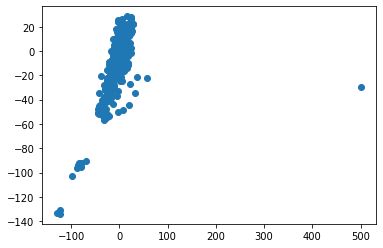

In [11]:
y_1 = model_elementwise_error(model_now,select='test',compare='MSE')
y_2 = model_elementwise_error(model_now_2,select='test',compare='MSE')

# correlations between the MAE of model 1s and model 2s
plt.scatter(y_1, y_2)
get_score(y_1, y_2)

# Combine models

## LC

/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


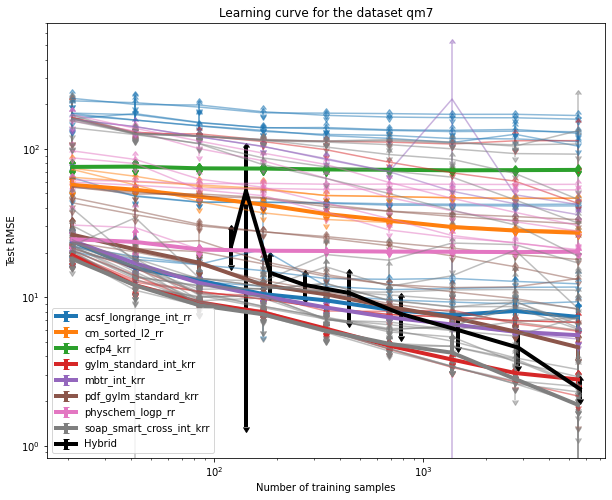

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
lc_by_model = {}
lc_by_model_train = {}
sc_name='RMSE'

i=0
for category, model_key in bmol.items():
    #print(category, model_key)
    best_error = 10**20.
    best_model = None
    for key_now in model_key:
        lc_by_model[key_now], lc_by_model_train[key_now], _ = get_learning_curve(by_model, model_key_now='bmol_'+key_now, 
                                                       sc_name=sc_name)
        #ax.errorbar(lc_by_model_train[key_now][:,0], lc_by_model_train[key_now][:,1], yerr=lc_by_model_train[key_now][:,2],
        #            linestyle='--', c=cm.tab10(i), alpha=0.5,
        #            uplims=True, lolims=True)
        ax.errorbar(lc_by_model[key_now][:,0], lc_by_model[key_now][:,1], yerr=lc_by_model[key_now][:,2],
                    linestyle='-', c=cm.tab10(i), alpha=0.5,
                    uplims=True, lolims=True)
        if np.mean(lc_by_model[key_now][:,1]) < best_error:
            best_error, best_model = np.mean(lc_by_model[key_now][:,1]), key_now
    ax.errorbar(lc_by_model[best_model][:,0], lc_by_model[best_model][:,1], yerr=lc_by_model[best_model][:,2],
                linestyle='-',linewidth=4, c=cm.tab10(i), alpha=1.0, label=best_model,
                uplims=True, lolims=True)    
    i+=1

lc_hybrid = fit_hybrid_lc(by_model, all_model_keys)
ax.errorbar(lc_hybrid[:,0], lc_hybrid[:,1], yerr=lc_hybrid[:,2],
                linestyle='-',linewidth=4, c='black', alpha=1.0, label="Hybrid",
                uplims=True, lolims=True) 

ax.legend(loc='best') # bbox_to_anchor=(1.3, 0.5))
ax.set_title('Learning curve for the dataset '+prefix)
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Test {}'.format(sc_name))

#plt.ylim([0.1,0.7])
ax.set_xscale('log')
ax.set_yscale('log')

fig.savefig(file_prefix+'-lc.pdf')

## model correlation matix

In [13]:
try:
    correlation_matrix = np.genfromtxt(prefix+'-model-mse.kmat')
    model_list = np.genfromtxt(prefix+'-model-mse.kmat', dtype='str')
except:
    correlation_matrix, model_list = model_correlation_matrix(by_model, max_train_frac, 'test', 'MSE', 
                                                              "PearsonR", verbose=True)
    np.savetxt(prefix+'-model-mse.kmat', correlation_matrix, fmt='%.8e')
    np.savetxt(prefix+'-model-mse.names', model_list, fmt='%s')

In [14]:
correlation_matrix_y, model_list = model_correlation_matrix(by_model, max_train_frac, 'test', 'y', 
                                                              "PearsonR", replica=4, verbose=True)

bmol_acsf_longrange_ext_rr bmol_acsf_longrange_ext_krr 0.9864367672005299
bmol_acsf_longrange_int_krr bmol_acsf_longrange_ext_krr 0.8632500354683723
bmol_acsf_longrange_int_krr bmol_acsf_longrange_ext_rr 0.8788905496048618
bmol_acsf_longrange_int_rr bmol_acsf_longrange_ext_krr 0.863005011267488
bmol_acsf_longrange_int_rr bmol_acsf_longrange_ext_rr 0.8788910229455381
bmol_acsf_longrange_int_rr bmol_acsf_longrange_int_krr 0.9996861474049568
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_ext_krr 0.7413653857764416
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_ext_rr 0.7322187509567072
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_int_krr 0.6501613353390682
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_int_rr 0.6501657376009609
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_ext_krr 0.7958899572776915
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_ext_rr 0.7851867292799849
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_int_krr 0.6944018453500261
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_int_rr 

bmol_ecfp4_krr bmol_cm_eigenspectrum_krr 0.9830310706777817
bmol_ecfp4_krr bmol_cm_eigenspectrum_rr 0.9829652525326796
bmol_ecfp4_krr bmol_cm_sorted_l2_krr 0.9750637471055812
bmol_ecfp4_krr bmol_cm_sorted_l2_rr 0.9755699815423774
bmol_ecfp4_rr bmol_acsf_longrange_ext_krr 0.87680687974475
bmol_ecfp4_rr bmol_acsf_longrange_ext_rr 0.8880049100534793
bmol_ecfp4_rr bmol_acsf_longrange_int_krr 0.9743998227523427
bmol_ecfp4_rr bmol_acsf_longrange_int_rr 0.9732216800306775
bmol_ecfp4_rr bmol_acsf_minimal_ext_krr 0.7213309657995575
bmol_ecfp4_rr bmol_acsf_minimal_ext_rr 0.763023838219472
bmol_ecfp4_rr bmol_acsf_minimal_int_krr 0.9867454336450959
bmol_ecfp4_rr bmol_acsf_minimal_int_rr 0.986952165743355
bmol_ecfp4_rr bmol_acsf_smart_ext_krr 0.8398176169198367
bmol_ecfp4_rr bmol_acsf_smart_ext_rr 0.8448815359640546
bmol_ecfp4_rr bmol_acsf_smart_int_krr 0.9752543433621679
bmol_ecfp4_rr bmol_acsf_smart_int_rr 0.9744999282088544
bmol_ecfp4_rr bmol_cm_eigenspectrum_krr 0.9837394806704958
bmol_ecfp4_rr

bmol_gylm_standard_ext_krr bmol_acsf_smart_ext_krr 0.8117316388775621
bmol_gylm_standard_ext_krr bmol_acsf_smart_ext_rr 0.8193327096454994
bmol_gylm_standard_ext_krr bmol_acsf_smart_int_krr 0.9812766584758413
bmol_gylm_standard_ext_krr bmol_acsf_smart_int_rr 0.9816332877238672
bmol_gylm_standard_ext_krr bmol_cm_eigenspectrum_krr 0.9627376623457963
bmol_gylm_standard_ext_krr bmol_cm_eigenspectrum_rr 0.9627802808626972
bmol_gylm_standard_ext_krr bmol_cm_sorted_l2_krr 0.9727301614243311
bmol_gylm_standard_ext_krr bmol_cm_sorted_l2_rr 0.9738653095005344
bmol_gylm_standard_ext_krr bmol_ecfp4_krr 0.9599907965290251
bmol_gylm_standard_ext_krr bmol_ecfp4_rr 0.9594172513488889
bmol_gylm_standard_ext_krr bmol_ecfp6_krr 0.9599907965290251
bmol_gylm_standard_ext_krr bmol_ecfp6_rr 0.9594172513488889
bmol_gylm_standard_ext_krr bmol_gylm_minimal_ext_krr 0.9025175589187556
bmol_gylm_standard_ext_krr bmol_gylm_minimal_ext_rr 0.9823609182278941
bmol_gylm_standard_ext_krr bmol_gylm_minimal_int_krr 0.9824

bmol_mbtr_ext_rr bmol_ecfp4_krr 0.9639938177491341
bmol_mbtr_ext_rr bmol_ecfp4_rr 0.9636027536198268
bmol_mbtr_ext_rr bmol_ecfp6_krr 0.9639938177491341
bmol_mbtr_ext_rr bmol_ecfp6_rr 0.9636027536198268
bmol_mbtr_ext_rr bmol_gylm_minimal_ext_krr 0.8843108302125697
bmol_mbtr_ext_rr bmol_gylm_minimal_ext_rr 0.9873998743621595
bmol_mbtr_ext_rr bmol_gylm_minimal_int_krr 0.9874195500145216
bmol_mbtr_ext_rr bmol_gylm_minimal_int_rr 0.9874195935018976
bmol_mbtr_ext_rr bmol_gylm_standard_ext_krr 0.966678907831809
bmol_mbtr_ext_rr bmol_gylm_standard_ext_rr 0.9875535087195113
bmol_mbtr_ext_rr bmol_gylm_standard_int_krr 0.9876067533770783
bmol_mbtr_ext_rr bmol_gylm_standard_int_rr 0.9876067405755456
bmol_mbtr_ext_rr bmol_mbtr_ext_krr 0.997531385453565
bmol_mbtr_int_krr bmol_acsf_longrange_ext_krr 0.8632213955095327
bmol_mbtr_int_krr bmol_acsf_longrange_ext_rr 0.8793889181112419
bmol_mbtr_int_krr bmol_acsf_longrange_int_krr 0.9992913180117301
bmol_mbtr_int_krr bmol_acsf_longrange_int_rr 0.999587862

bmol_pdf_gylm_standard_krr bmol_ecfp4_rr 0.9729331167270163
bmol_pdf_gylm_standard_krr bmol_ecfp6_krr 0.9733635507272297
bmol_pdf_gylm_standard_krr bmol_ecfp6_rr 0.9729331167270163
bmol_pdf_gylm_standard_krr bmol_gylm_minimal_ext_krr 0.890334205679555
bmol_pdf_gylm_standard_krr bmol_gylm_minimal_ext_rr 0.9996493593673091
bmol_pdf_gylm_standard_krr bmol_gylm_minimal_int_krr 0.9996320691710433
bmol_pdf_gylm_standard_krr bmol_gylm_minimal_int_rr 0.999632046196063
bmol_pdf_gylm_standard_krr bmol_gylm_standard_ext_krr 0.982415840910227
bmol_pdf_gylm_standard_krr bmol_gylm_standard_ext_rr 0.9998305807161395
bmol_pdf_gylm_standard_krr bmol_gylm_standard_int_krr 0.9998302088573388
bmol_pdf_gylm_standard_krr bmol_gylm_standard_int_rr 0.9998302012260365
bmol_pdf_gylm_standard_krr bmol_mbtr_ext_krr 0.9828659897573355
bmol_pdf_gylm_standard_krr bmol_mbtr_ext_rr 0.9877406400790574
bmol_pdf_gylm_standard_krr bmol_mbtr_int_krr 0.9996887796655263
bmol_pdf_gylm_standard_krr bmol_mbtr_int_rr 0.999717764

bmol_pdf_soap_standard_krr bmol_cm_sorted_l2_rr 0.9923232760879361
bmol_pdf_soap_standard_krr bmol_ecfp4_krr 0.9750890762829794
bmol_pdf_soap_standard_krr bmol_ecfp4_rr 0.9746496980878631
bmol_pdf_soap_standard_krr bmol_ecfp6_krr 0.9750890762829794
bmol_pdf_soap_standard_krr bmol_ecfp6_rr 0.9746496980878631
bmol_pdf_soap_standard_krr bmol_gylm_minimal_ext_krr 0.891777785000856
bmol_pdf_soap_standard_krr bmol_gylm_minimal_ext_rr 0.9981029670914668
bmol_pdf_soap_standard_krr bmol_gylm_minimal_int_krr 0.9981102187323528
bmol_pdf_soap_standard_krr bmol_gylm_minimal_int_rr 0.9981102415622439
bmol_pdf_soap_standard_krr bmol_gylm_standard_ext_krr 0.9813065232487806
bmol_pdf_soap_standard_krr bmol_gylm_standard_ext_rr 0.9981846534102828
bmol_pdf_soap_standard_krr bmol_gylm_standard_int_krr 0.9982051818919485
bmol_pdf_soap_standard_krr bmol_gylm_standard_int_rr 0.9982051796451344
bmol_pdf_soap_standard_krr bmol_mbtr_ext_krr 0.980876573321094
bmol_pdf_soap_standard_krr bmol_mbtr_ext_rr 0.9857946

bmol_physchem_core_rf bmol_acsf_minimal_int_krr 0.9825537410609237
bmol_physchem_core_rf bmol_acsf_minimal_int_rr 0.9832116172130474
bmol_physchem_core_rf bmol_acsf_smart_ext_krr 0.7909378219628664
bmol_physchem_core_rf bmol_acsf_smart_ext_rr 0.7991571596856882
bmol_physchem_core_rf bmol_acsf_smart_int_krr 0.9924346522154813
bmol_physchem_core_rf bmol_acsf_smart_int_rr 0.9920182420260303
bmol_physchem_core_rf bmol_cm_eigenspectrum_krr 0.9740803865851537
bmol_physchem_core_rf bmol_cm_eigenspectrum_rr 0.9743181576081672
bmol_physchem_core_rf bmol_cm_sorted_l2_krr 0.9889175734502152
bmol_physchem_core_rf bmol_cm_sorted_l2_rr 0.9895405893745556
bmol_physchem_core_rf bmol_ecfp4_krr 0.9723819662134987
bmol_physchem_core_rf bmol_ecfp4_rr 0.9724023437800493
bmol_physchem_core_rf bmol_ecfp6_krr 0.9723819662134987
bmol_physchem_core_rf bmol_ecfp6_rr 0.9724023437800493
bmol_physchem_core_rf bmol_gylm_minimal_ext_krr 0.8792600017324537
bmol_physchem_core_rf bmol_gylm_minimal_ext_rr 0.9918096981166

bmol_physchem_extended_rr bmol_gylm_standard_int_rr 0.9959900229494634
bmol_physchem_extended_rr bmol_mbtr_ext_krr 0.9790282428293224
bmol_physchem_extended_rr bmol_mbtr_ext_rr 0.9837563416833364
bmol_physchem_extended_rr bmol_mbtr_int_krr 0.9961747216264623
bmol_physchem_extended_rr bmol_mbtr_int_rr 0.9961627315653758
bmol_physchem_extended_rr bmol_pdf_gylm_minimal_krr 0.9966527808258169
bmol_physchem_extended_rr bmol_pdf_gylm_minimal_rr 0.996496962418826
bmol_physchem_extended_rr bmol_pdf_gylm_standard_krr 0.9960975573311055
bmol_physchem_extended_rr bmol_pdf_gylm_standard_rr 0.9960502528103568
bmol_physchem_extended_rr bmol_pdf_soap_minimal_krr 0.9891993886794027
bmol_physchem_extended_rr bmol_pdf_soap_minimal_rr 0.9881599815554017
bmol_physchem_extended_rr bmol_pdf_soap_standard_krr 0.995632249137296
bmol_physchem_extended_rr bmol_pdf_soap_standard_rr 0.9954199670361504
bmol_physchem_extended_rr bmol_physchem_basic_rf 0.9955539588742265
bmol_physchem_extended_rr bmol_physchem_basic

bmol_soap_longrange_cross_ext_rr bmol_acsf_longrange_ext_rr 0.879562164617217
bmol_soap_longrange_cross_ext_rr bmol_acsf_longrange_int_krr 0.9992307400860968
bmol_soap_longrange_cross_ext_rr bmol_acsf_longrange_int_rr 0.9995919043689074
bmol_soap_longrange_cross_ext_rr bmol_acsf_minimal_ext_krr 0.6497886890807199
bmol_soap_longrange_cross_ext_rr bmol_acsf_minimal_ext_rr 0.6953395166194891
bmol_soap_longrange_cross_ext_rr bmol_acsf_minimal_int_krr 0.9837814791410576
bmol_soap_longrange_cross_ext_rr bmol_acsf_minimal_int_rr 0.9841854764631687
bmol_soap_longrange_cross_ext_rr bmol_acsf_smart_ext_krr 0.807027590316454
bmol_soap_longrange_cross_ext_rr bmol_acsf_smart_ext_rr 0.8147013807621802
bmol_soap_longrange_cross_ext_rr bmol_acsf_smart_int_krr 0.9985954194825593
bmol_soap_longrange_cross_ext_rr bmol_acsf_smart_int_rr 0.9989408600747772
bmol_soap_longrange_cross_ext_rr bmol_cm_eigenspectrum_krr 0.9780885658836598
bmol_soap_longrange_cross_ext_rr bmol_cm_eigenspectrum_rr 0.97824901698929

bmol_soap_longrange_nocross_ext_krr bmol_acsf_minimal_ext_rr 0.6888776872469804
bmol_soap_longrange_nocross_ext_krr bmol_acsf_minimal_int_krr 0.9750325302843784
bmol_soap_longrange_nocross_ext_krr bmol_acsf_minimal_int_rr 0.9753230026300922
bmol_soap_longrange_nocross_ext_krr bmol_acsf_smart_ext_krr 0.8064917347730219
bmol_soap_longrange_nocross_ext_krr bmol_acsf_smart_ext_rr 0.8141498426142593
bmol_soap_longrange_nocross_ext_krr bmol_acsf_smart_int_krr 0.9895072367149311
bmol_soap_longrange_nocross_ext_krr bmol_acsf_smart_int_rr 0.9895398860069405
bmol_soap_longrange_nocross_ext_krr bmol_cm_eigenspectrum_krr 0.9685798475844523
bmol_soap_longrange_nocross_ext_krr bmol_cm_eigenspectrum_rr 0.9687167487558614
bmol_soap_longrange_nocross_ext_krr bmol_cm_sorted_l2_krr 0.981463785829001
bmol_soap_longrange_nocross_ext_krr bmol_cm_sorted_l2_rr 0.982378765160581
bmol_soap_longrange_nocross_ext_krr bmol_ecfp4_krr 0.9649472656537388
bmol_soap_longrange_nocross_ext_krr bmol_ecfp4_rr 0.96415830600

bmol_soap_longrange_nocross_int_krr bmol_acsf_minimal_int_krr 0.9837416044204764
bmol_soap_longrange_nocross_int_krr bmol_acsf_minimal_int_rr 0.9841214101267189
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_ext_krr 0.8069703800019586
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_ext_rr 0.8146372964189255
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_int_krr 0.9985217731772486
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_int_rr 0.9988919158854743
bmol_soap_longrange_nocross_int_krr bmol_cm_eigenspectrum_krr 0.9781729225544374
bmol_soap_longrange_nocross_int_krr bmol_cm_eigenspectrum_rr 0.978331837982176
bmol_soap_longrange_nocross_int_krr bmol_cm_sorted_l2_krr 0.9917348710734842
bmol_soap_longrange_nocross_int_krr bmol_cm_sorted_l2_rr 0.9925048775827697
bmol_soap_longrange_nocross_int_krr bmol_ecfp4_krr 0.973206249215333
bmol_soap_longrange_nocross_int_krr bmol_ecfp4_rr 0.9728053698813205
bmol_soap_longrange_nocross_int_krr bmol_ecfp6_krr 0.973206249215333
bmol_

bmol_soap_minimal_cross_ext_krr bmol_acsf_longrange_int_rr 0.8839801801544056
bmol_soap_minimal_cross_ext_krr bmol_acsf_minimal_ext_krr 0.7036578257176185
bmol_soap_minimal_cross_ext_krr bmol_acsf_minimal_ext_rr 0.769042235930383
bmol_soap_minimal_cross_ext_krr bmol_acsf_minimal_int_krr 0.887459611066779
bmol_soap_minimal_cross_ext_krr bmol_acsf_minimal_int_rr 0.8852346935539549
bmol_soap_minimal_cross_ext_krr bmol_acsf_smart_ext_krr 0.9278038663643917
bmol_soap_minimal_cross_ext_krr bmol_acsf_smart_ext_rr 0.9356542084211464
bmol_soap_minimal_cross_ext_krr bmol_acsf_smart_int_krr 0.8855716301279489
bmol_soap_minimal_cross_ext_krr bmol_acsf_smart_int_rr 0.8855079860277836
bmol_soap_minimal_cross_ext_krr bmol_cm_eigenspectrum_krr 0.8674116155151974
bmol_soap_minimal_cross_ext_krr bmol_cm_eigenspectrum_rr 0.8668917753224127
bmol_soap_minimal_cross_ext_krr bmol_cm_sorted_l2_krr 0.8697600012094981
bmol_soap_minimal_cross_ext_krr bmol_cm_sorted_l2_rr 0.8711255836578892
bmol_soap_minimal_cros

bmol_soap_minimal_cross_int_krr bmol_gylm_minimal_int_rr 0.9998239352805751
bmol_soap_minimal_cross_int_krr bmol_gylm_standard_ext_krr 0.9824826294695589
bmol_soap_minimal_cross_int_krr bmol_gylm_standard_ext_rr 0.9997596494372328
bmol_soap_minimal_cross_int_krr bmol_gylm_standard_int_krr 0.999761964708029
bmol_soap_minimal_cross_int_krr bmol_gylm_standard_int_rr 0.9997619609207068
bmol_soap_minimal_cross_int_krr bmol_mbtr_ext_krr 0.9825386766796561
bmol_soap_minimal_cross_int_krr bmol_mbtr_ext_rr 0.9874530534292565
bmol_soap_minimal_cross_int_krr bmol_mbtr_int_krr 0.999635546184317
bmol_soap_minimal_cross_int_krr bmol_mbtr_int_rr 0.9996573722275026
bmol_soap_minimal_cross_int_krr bmol_pdf_gylm_minimal_krr 0.9994585019400873
bmol_soap_minimal_cross_int_krr bmol_pdf_gylm_minimal_rr 0.9994476762133574
bmol_soap_minimal_cross_int_krr bmol_pdf_gylm_standard_krr 0.9997141248511273
bmol_soap_minimal_cross_int_krr bmol_pdf_gylm_standard_rr 0.9996061758425363
bmol_soap_minimal_cross_int_krr bm

bmol_soap_minimal_nocross_ext_krr bmol_physchem_core_rf 0.8839608236026328
bmol_soap_minimal_nocross_ext_krr bmol_physchem_core_rr 0.8996182366388616
bmol_soap_minimal_nocross_ext_krr bmol_physchem_extended_rf 0.8899334339949083
bmol_soap_minimal_nocross_ext_krr bmol_physchem_extended_rr 0.8892150683689278
bmol_soap_minimal_nocross_ext_krr bmol_physchem_logp_rf 0.8915586517384216
bmol_soap_minimal_nocross_ext_krr bmol_physchem_logp_rr 0.8892150683690225
bmol_soap_minimal_nocross_ext_krr bmol_soap_longrange_cross_ext_krr 0.8958152732903998
bmol_soap_minimal_nocross_ext_krr bmol_soap_longrange_cross_ext_rr 0.8958473236254567
bmol_soap_minimal_nocross_ext_krr bmol_soap_longrange_cross_int_krr 0.8957439838283853
bmol_soap_minimal_nocross_ext_krr bmol_soap_longrange_cross_int_rr 0.8958292466226268
bmol_soap_minimal_nocross_ext_krr bmol_soap_longrange_nocross_ext_krr 0.8976058593314175
bmol_soap_minimal_nocross_ext_krr bmol_soap_longrange_nocross_ext_rr 0.8956559573434459
bmol_soap_minimal_n

bmol_soap_minimal_nocross_int_krr bmol_physchem_extended_rr 0.9964509748481161
bmol_soap_minimal_nocross_int_krr bmol_physchem_logp_rf 0.996611487304933
bmol_soap_minimal_nocross_int_krr bmol_physchem_logp_rr 0.9964509748481171
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_cross_ext_krr 0.9962348990300003
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_cross_ext_rr 0.999495254927938
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_cross_int_krr 0.9995181677082051
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_cross_int_rr 0.9994983409654664
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_nocross_ext_krr 0.9906414059919936
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_nocross_ext_rr 0.999507805807511
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_nocross_int_krr 0.9995085806551778
bmol_soap_minimal_nocross_int_krr bmol_soap_longrange_nocross_int_rr 0.9995378387396996
bmol_soap_minimal_nocross_int_krr bmol_soap_minimal_cross_ext_krr 0.881899

bmol_soap_smart_cross_ext_rr bmol_acsf_smart_ext_krr 0.8066554278551125
bmol_soap_smart_cross_ext_rr bmol_acsf_smart_ext_rr 0.8144097013323477
bmol_soap_smart_cross_ext_rr bmol_acsf_smart_int_krr 0.9986389018267671
bmol_soap_smart_cross_ext_rr bmol_acsf_smart_int_rr 0.9989762327624472
bmol_soap_smart_cross_ext_rr bmol_cm_eigenspectrum_krr 0.9780708124415394
bmol_soap_smart_cross_ext_rr bmol_cm_eigenspectrum_rr 0.9782307168413114
bmol_soap_smart_cross_ext_rr bmol_cm_sorted_l2_krr 0.9917529391511611
bmol_soap_smart_cross_ext_rr bmol_cm_sorted_l2_rr 0.9925179282248713
bmol_soap_smart_cross_ext_rr bmol_ecfp4_krr 0.9732267832019914
bmol_soap_smart_cross_ext_rr bmol_ecfp4_rr 0.9727949335229717
bmol_soap_smart_cross_ext_rr bmol_ecfp6_krr 0.9732267832019914
bmol_soap_smart_cross_ext_rr bmol_ecfp6_rr 0.9727949335229717
bmol_soap_smart_cross_ext_rr bmol_gylm_minimal_ext_krr 0.8903713811723253
bmol_soap_smart_cross_ext_rr bmol_gylm_minimal_ext_rr 0.9997282830290247
bmol_soap_smart_cross_ext_rr bm

bmol_soap_smart_cross_int_rr bmol_gylm_standard_ext_krr 0.9827010794871806
bmol_soap_smart_cross_int_rr bmol_gylm_standard_ext_rr 0.9999727499960686
bmol_soap_smart_cross_int_rr bmol_gylm_standard_int_krr 0.9999630751577405
bmol_soap_smart_cross_int_rr bmol_gylm_standard_int_rr 0.9999630730695463
bmol_soap_smart_cross_int_rr bmol_mbtr_ext_krr 0.9826824680149837
bmol_soap_smart_cross_int_rr bmol_mbtr_ext_rr 0.9875617828555643
bmol_soap_smart_cross_int_rr bmol_mbtr_int_krr 0.9997561988050893
bmol_soap_smart_cross_int_rr bmol_mbtr_int_rr 0.9997849356170191
bmol_soap_smart_cross_int_rr bmol_pdf_gylm_minimal_krr 0.999341458761972
bmol_soap_smart_cross_int_rr bmol_pdf_gylm_minimal_rr 0.9993204271399488
bmol_soap_smart_cross_int_rr bmol_pdf_gylm_standard_krr 0.999820380671912
bmol_soap_smart_cross_int_rr bmol_pdf_gylm_standard_rr 0.9997064018153555
bmol_soap_smart_cross_int_rr bmol_pdf_soap_minimal_krr 0.9904016443254475
bmol_soap_smart_cross_int_rr bmol_pdf_soap_minimal_rr 0.9890391409678091

bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_ext_krr 0.8902930335131344
bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_ext_rr 0.999760819096046
bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_int_krr 0.9997464259591154
bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_int_rr 0.9997464577143057
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_ext_krr 0.9825302541443124
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_ext_rr 0.9998264689436996
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_int_krr 0.9998550954795002
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_int_rr 0.9998550836534776
bmol_soap_smart_nocross_ext_rr bmol_mbtr_ext_krr 0.9825631104777469
bmol_soap_smart_nocross_ext_rr bmol_mbtr_ext_rr 0.9874771193429185
bmol_soap_smart_nocross_ext_rr bmol_mbtr_int_krr 0.9997124526035582
bmol_soap_smart_nocross_ext_rr bmol_mbtr_int_rr 0.9997371422635607
bmol_soap_smart_nocross_ext_rr bmol_pdf_gylm_minimal_krr 0.999359139756422
bmol_soap_smart_nocross_ext_rr bmol_pdf_gylm_min

bmol_soap_smart_nocross_int_rr bmol_acsf_longrange_int_rr 0.9996305161082795
bmol_soap_smart_nocross_int_rr bmol_acsf_minimal_ext_krr 0.6509659902192962
bmol_soap_smart_nocross_int_rr bmol_acsf_minimal_ext_rr 0.6961623387074892
bmol_soap_smart_nocross_int_rr bmol_acsf_minimal_int_krr 0.9839547883832084
bmol_soap_smart_nocross_int_rr bmol_acsf_minimal_int_rr 0.9843879775778935
bmol_soap_smart_nocross_int_rr bmol_acsf_smart_ext_krr 0.8081095266793872
bmol_soap_smart_nocross_int_rr bmol_acsf_smart_ext_rr 0.8157833234249193
bmol_soap_smart_nocross_int_rr bmol_acsf_smart_int_krr 0.9987103520223947
bmol_soap_smart_nocross_int_rr bmol_acsf_smart_int_rr 0.9990362472366177
bmol_soap_smart_nocross_int_rr bmol_cm_eigenspectrum_krr 0.9781582037587592
bmol_soap_smart_nocross_int_rr bmol_cm_eigenspectrum_rr 0.978312907070784
bmol_soap_smart_nocross_int_rr bmol_cm_sorted_l2_krr 0.9918473546001823
bmol_soap_smart_nocross_int_rr bmol_cm_sorted_l2_rr 0.992582235639862
bmol_soap_smart_nocross_int_rr bmol

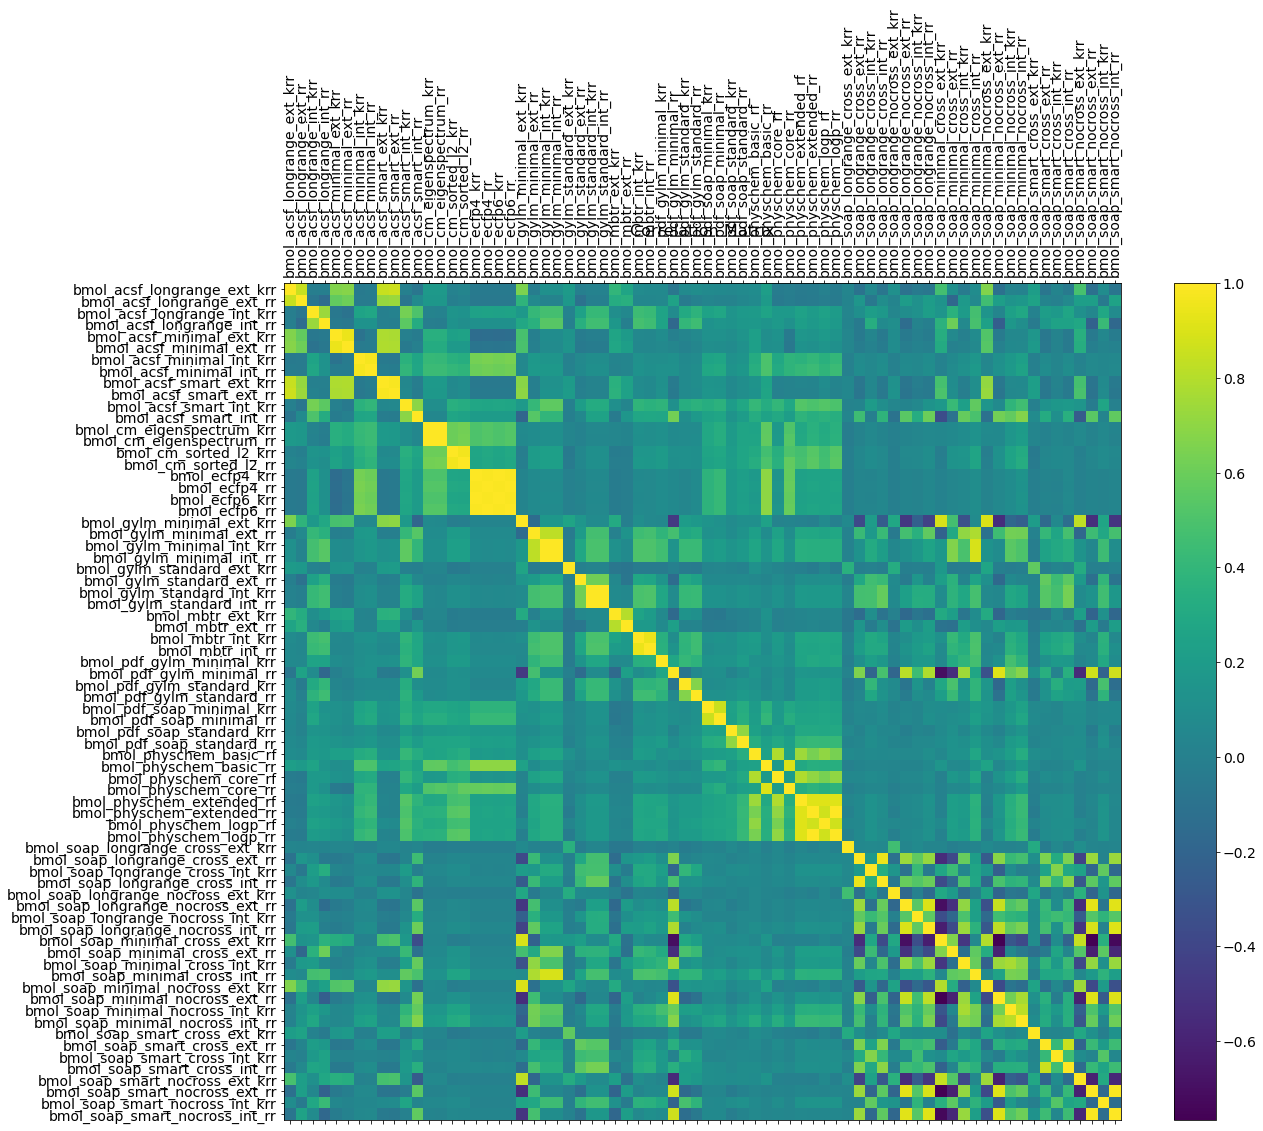

In [15]:
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation_matrix, fignum=f.number)
plt.xticks(range(correlation_matrix.shape[1]), by_model.keys(), fontsize=14, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), by_model.keys(), fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## KPCA this correlation matrix

In [16]:
from asaplib.reducedim import Dimension_Reducers

reduce_dict = {}
reduce_dict['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 10,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'linear'}}}}
dreducer = Dimension_Reducers(reduce_dict)

Using kernel PCA (sparsified) ...


/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/umap_learn-0.4.3-py3.7.egg/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [17]:
proj = dreducer.fit_transform(np.abs(correlation_matrix))

Not using any sparsification


# Visualizations

In [18]:
from asaplib.plot import Plotters

Using scatter plot ...
Using annotation plot ...


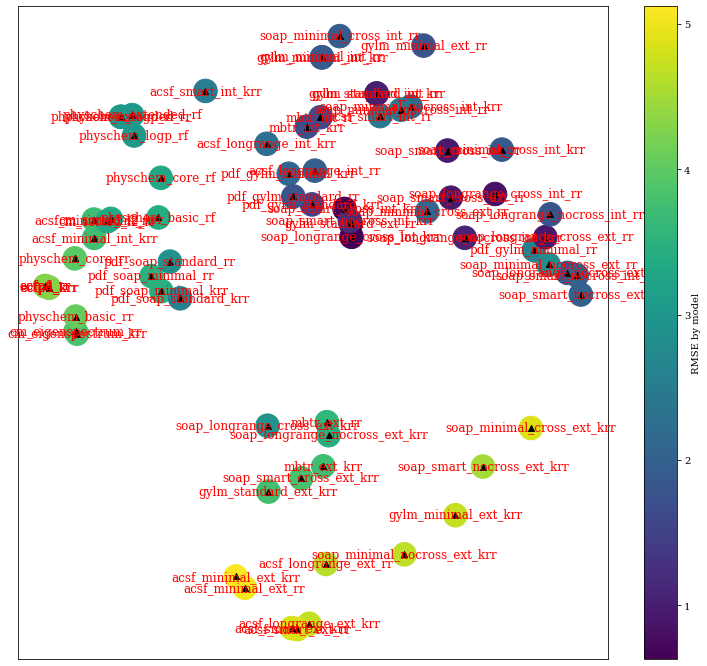

In [19]:
fig_spec = { 'outfile': file_prefix+'-model-kpca.pdf',
                'show': False,
                'title': None,
                'size': [12*1.1, 12],
                'xlabel': None, 'ylabel': None,
                            'xaxis': False, 'yaxis': False,
                            'remove_tick': True,
                'cmap': 'viridis',
                    'components':{
                    'first_p': {'type': 'scatter', 'clabel': 'RMSE by model',
                                'vmin':None, 'vmax': None},
                    'second_p': {"type": 'annotate', 'adtext': False} 
                    }
                   }
    
asap_plot = Plotters(fig_spec)

plotcolor = [ np.log(lc_by_model[k[5:]][-1,1]) for k in by_model.keys()]
annotate = list([ x[5:] for x in by_model.keys()])
asap_plot.plot(proj[:, [0,1]], plotcolor, [], annotate)
#fig.savefig(file_prefix+'-model-kpca.pdf')

## compare all models (with diff train ratios)

# kernel matrix of descriptors

In [20]:
# note that we clip the min
desc_kmat = np.clip(np.loadtxt(prefix+"-descriptors-spearman.kmat"),0,1)
#desc_kmat = desc_kmat+np.ones(np.shape(desc_kmat))
desc_names = np.genfromtxt(prefix+"-descriptors.names", dtype='str')

In [21]:
print(desc_names)

['bmol_acsf_minimal_int_krr' 'bmol_acsf_minimal_ext_krr'
 'bmol_acsf_smart_int_krr' 'bmol_acsf_smart_ext_krr'
 'bmol_acsf_longrange_int_krr' 'bmol_acsf_longrange_ext_krr'
 'bmol_cm_sorted_l2_krr' 'bmol_cm_eigenspectrum_krr' 'bmol_ecfp4_krr'
 'bmol_ecfp6_krr' 'bmol_gylm_minimal_int_krr' 'bmol_gylm_standard_int_krr'
 'bmol_gylm_minimal_ext_krr' 'bmol_gylm_standard_ext_krr'
 'bmol_mbtr_int_krr' 'bmol_mbtr_ext_krr' 'bmol_pdf_soap_standard_krr'
 'bmol_pdf_gylm_standard_krr' 'bmol_pdf_soap_minimal_krr'
 'bmol_pdf_gylm_minimal_krr' 'bmol_soap_minimal_nocross_int_krr'
 'bmol_soap_minimal_cross_int_krr' 'bmol_soap_smart_nocross_int_krr'
 'bmol_soap_smart_cross_int_krr' 'bmol_soap_longrange_nocross_int_krr'
 'bmol_soap_longrange_cross_int_krr' 'bmol_soap_minimal_nocross_ext_krr'
 'bmol_soap_minimal_cross_ext_krr' 'bmol_soap_smart_nocross_ext_krr'
 'bmol_soap_smart_cross_ext_krr' 'bmol_soap_longrange_nocross_ext_krr'
 'bmol_soap_longrange_cross_ext_krr']


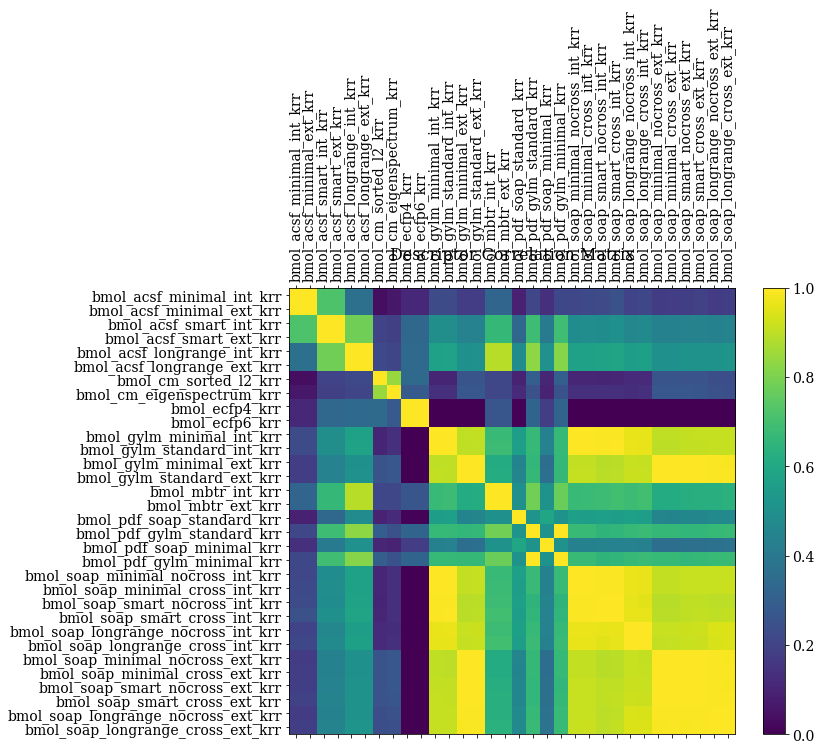

In [22]:
f = plt.figure(figsize=(10, 8))
plt.matshow(desc_kmat, fignum=f.number,vmin=None, vmax=None)
plt.xticks(range(desc_kmat.shape[1]), desc_names, fontsize=14, rotation=90)
plt.yticks(range(desc_kmat.shape[1]), desc_names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Descriptor Correlation Matrix', fontsize=16);

In [23]:
reduce_dict2 = {}
reduce_dict2['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 10,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'cosine'}}}}

dreducer2 = Dimension_Reducers(reduce_dict2)
proj = dreducer2.fit_transform(desc_kmat)

Using kernel PCA (sparsified) ...
Not using any sparsification


Using scatter plot ...
Using annotation plot ...


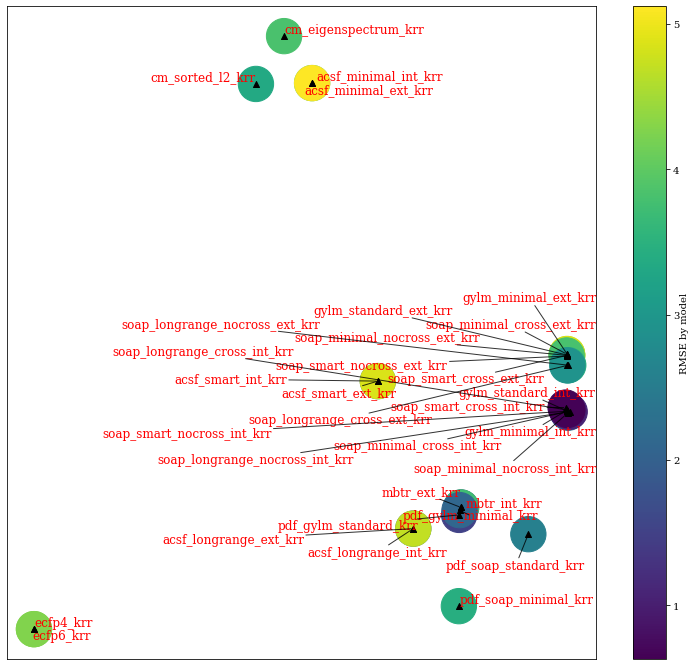

In [24]:
fig_spec = { 'outfile': file_prefix+'-descriptor-similarity.pdf',
                'show': False,
                'title': None,
                'size': [12*1.1, 12],
                'xlabel': None, 'ylabel': None,
                            'xaxis': False, 'yaxis': False,
                            'remove_tick': True,
                'cmap': 'viridis',
                    'components':{
                    'first_p': {'type': 'scatter', 'clabel': 'RMSE by model',
                                'vmin':None, 'vmax': None},
                    'second_p': {"type": 'annotate', 'adtext': True} 
                    }
                   }
    
asap_plot = Plotters(fig_spec)
plotcolor = [ lc_by_model[k[5:]][-1,1] for k in desc_names]
annotate = list([ x[5:] for x in desc_names])
#plotcolor = np.arange(len(proj))
asap_plot.plot(proj[:, [0,2]], np.log(plotcolor), [], annotate)

In [25]:
# select out certain components
sub_correlation_matrix = np.ones((len(desc_names),len(desc_names)))
sub_lc_matrix = np.ones((len(desc_names),len(desc_names),2))

for i, desc in enumerate(desc_names):
    index_now = list(by_model.keys()).index(desc)
    for j, desc2 in enumerate(desc_names):
        index_2 = list(by_model.keys()).index(desc2)
        sub_correlation_matrix[i,j] = correlation_matrix_y[index_now,index_2]
        sub_lc_matrix[i,j] = [ lc_by_model[desc[5:]][-1,1] , lc_by_model[desc2[5:]][-1,1]]
np.min(sub_correlation_matrix)

0.640943485301507

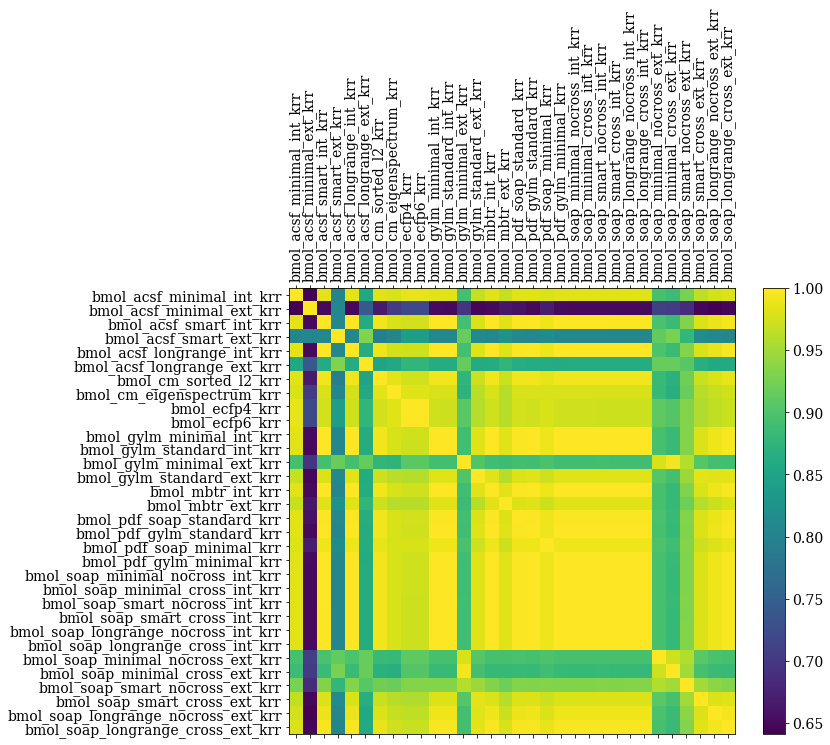

In [26]:
f = plt.figure(figsize=(10, 8))
plt.matshow(sub_correlation_matrix, fignum=f.number)
plt.xticks(range(sub_correlation_matrix.shape[1]), desc_names, fontsize=14, rotation=90)
plt.yticks(range(sub_correlation_matrix.shape[1]), desc_names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Descriptor Correlation Matrix', fontsize=16);

In [28]:
plotcolor = [ lc_by_model[k[5:]][-1,1] for k in desc_names]

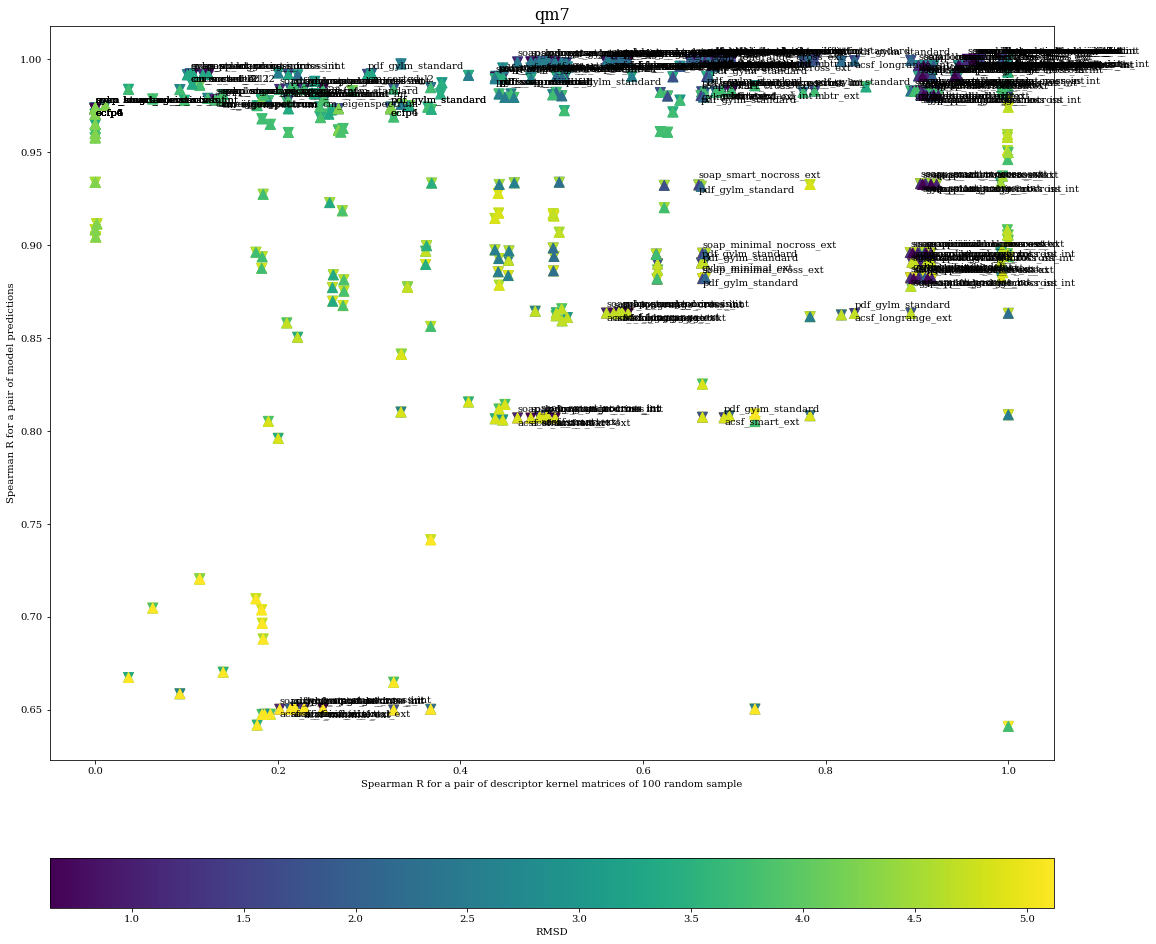

In [29]:
fig, ax = plt.subplots(figsize=(18,18))
p1 = ax.scatter(desc_kmat.flatten(),sub_correlation_matrix.flatten(), 
            marker='v', s=100, c=np.log(sub_lc_matrix[:,:,0].flatten()))
ax.scatter(desc_kmat.flatten(),sub_correlation_matrix.flatten(), 
            marker='^', s=100, c=np.log(sub_lc_matrix[:,:,1].flatten()))

cbar = fig.colorbar(p1, orientation="horizontal", pad=0.1)
cbar.set_label('RMSD')

desc_ex_best = []

ylimit=[np.min(sub_correlation_matrix),1]
offset = min((np.max(sub_correlation_matrix)-np.min(sub_correlation_matrix))/100., (ylimit[1]-ylimit[0])/100.,)
error_limit = np.percentile(sub_lc_matrix, 20)

for i, desc in enumerate(desc_names):
    for j, desc2 in enumerate(desc_names):
        if i>j and (sub_lc_matrix[i,j,0]<error_limit or sub_lc_matrix[i,j,1]<error_limit): # and desc[-7:-4] != 'ext' and desc2[-7:-4] != 'ext':
            desc_ex_best.append([desc_kmat[i,j],sub_correlation_matrix[i,j]])
            ax.annotate(desc[5:-4],(desc_kmat[i,j],sub_correlation_matrix[i,j]),
                        xytext = (desc_kmat[i,j], offset+sub_correlation_matrix[i,j]))
            ax.annotate(desc2[5:-4],(desc_kmat[i,j],sub_correlation_matrix[i,j]), 
                        xytext = (desc_kmat[i,j], -offset+sub_correlation_matrix[i,j]))
#plt.ylim(ylimit)
ax.set_xlabel("Spearman R for a pair of descriptor kernel matrices of 100 random sample")
ax.set_ylabel("Spearman R for a pair of model predictions")
ax.set_title(prefix, fontsize=16);

plt.savefig(prefix+'-corr-desc-model.pdf')

In [30]:
get_score(sub_correlation_matrix.flatten(), desc_kmat.flatten())

{'MAE': 0.39309961315710884,
 'RMSE': 0.49435458766229623,
 'SUP': 0.9740022517352946,
 'R2': -1.384761532904815,
 'SpearmanR': 0.3247008504468983,
 'PearsonR': 0.20622731110577114}

In [31]:
get_score(np.array(np.matrix(desc_ex_best)[:,0].flatten())[0],
          np.array(np.matrix(desc_ex_best)[:,1].flatten())[0])

{'MAE': 0.3194468896577746,
 'RMSE': 0.43735092970040934,
 'SUP': 0.9733368021007774,
 'R2': -31.597057443110558,
 'SpearmanR': 0.39148588074701096,
 'PearsonR': 0.1845490478700491}

In [32]:
select_models = []
invRMSE = np.asarray([ np.array([i, 1./lc_by_model[k[5:]][-1,1]]) for i, k in enumerate(desc_names)])
for step in range(4):
    sortedinvRMSE = invRMSE[invRMSE[:,1].argsort()][::-1]
    select = [ int(sortedinvRMSE[0,0]),sortedinvRMSE[0,1] ]
    invRMSE[select[0],1] = 0.0
    #symselected[step] = int(sortedinvRMSE[0,0])
    print(select, desc_names[select[0]])
    select_models.append( desc_names[select[0]])
    for index in range(len(desc_names)):
        invRMSE[index,1] *= (1.-abs(desc_kmat[select[0],index]))

[23, 0.5314683771348446] bmol_soap_smart_cross_int_krr
[17, 0.07387095695008744] bmol_pdf_gylm_standard_krr
[6, 0.022341217571297034] bmol_cm_sorted_l2_krr
[16, 0.014611637098227132] bmol_pdf_soap_standard_krr


/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since 

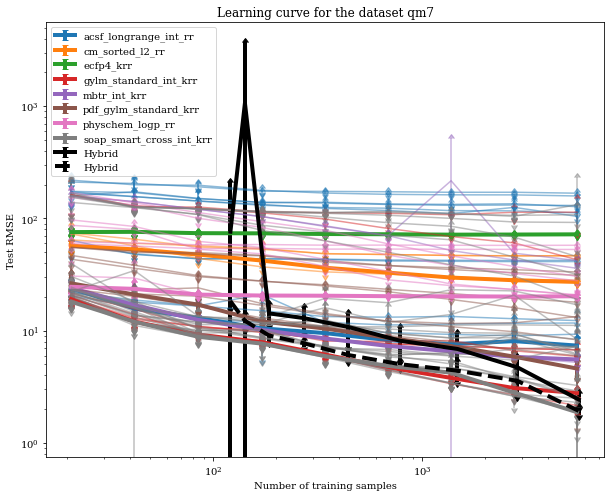

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
lc_by_model = {}
lc_by_model_train = {}
sc_name='RMSE'

i=0
for category, model_key in bmol.items():
    #print(category, model_key)
    best_error = 10**20.
    best_model = None
    for key_now in model_key:
        lc_by_model[key_now], lc_by_model_train[key_now], _ = get_learning_curve(by_model, model_key_now='bmol_'+key_now, 
                                                       sc_name=sc_name)
        #ax.errorbar(lc_by_model_train[key_now][:,0], lc_by_model_train[key_now][:,1], yerr=lc_by_model_train[key_now][:,2],
        #            linestyle='--', c=cm.tab10(i), alpha=0.5,
        #            uplims=True, lolims=True)
        ax.errorbar(lc_by_model[key_now][:,0], lc_by_model[key_now][:,1], yerr=lc_by_model[key_now][:,2],
                    linestyle='-', c=cm.tab10(i), alpha=0.5,
                    uplims=True, lolims=True)
        if np.mean(lc_by_model[key_now][:,1]) < best_error:
            best_error, best_model = np.mean(lc_by_model[key_now][:,1]), key_now
    ax.errorbar(lc_by_model[best_model][:,0], lc_by_model[best_model][:,1], yerr=lc_by_model[best_model][:,2],
                linestyle='-',linewidth=4, c=cm.tab10(i), alpha=1.0, label=best_model,
                uplims=True, lolims=True)    
    i+=1

lc_hybrid = fit_hybrid_lc(by_model, all_model_keys, alpha=0.001)
ax.errorbar(lc_hybrid[:,0], lc_hybrid[:,1], yerr=lc_hybrid[:,2],
                linestyle='-',linewidth=4, c='black', alpha=1.0, label="Hybrid",
                uplims=True, lolims=True) 

lc_hybrid = fit_hybrid_lc(by_model, select_models, alpha=0.001)
ax.errorbar(lc_hybrid[:,0], lc_hybrid[:,1], yerr=lc_hybrid[:,2],
                linestyle='--',linewidth=4, c='black', alpha=1.0, label="Hybrid",
                uplims=True, lolims=True) 

ax.legend(loc='best') # bbox_to_anchor=(1.3, 0.5))
ax.set_title('Learning curve for the dataset '+prefix)
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Test {}'.format(sc_name))

#plt.ylim([0.1,0.7])
ax.set_xscale('log')
ax.set_yscale('log')

fig.savefig(file_prefix+'-lc.pdf')